# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | ketchikan
Processing Record 5 of Set 1 | alotau
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | freeport
Processing Record 10 of Set 1 | mount pearl
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | port hedland
Processing Record 16 of Set 1 | san antonio de pale
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | waingapu
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | aykhal
Processing Record 21 of Set 1 | san pedro 

Processing Record 38 of Set 4 | syktyvkar
Processing Record 39 of Set 4 | motygino
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | acolla
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | ola
Processing Record 44 of Set 4 | kalaleh
Processing Record 45 of Set 4 | milford haven
Processing Record 46 of Set 4 | olyokminsk
Processing Record 47 of Set 4 | urangan
Processing Record 48 of Set 4 | rumbek
Processing Record 49 of Set 4 | suoyarvi
Processing Record 0 of Set 5 | jamestown
Processing Record 1 of Set 5 | masinloc
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | weno
Processing Record 4 of Set 5 | lawas
Processing Record 5 of Set 5 | cheremushki
Processing Record 6 of Set 5 | kone
Processing Record 7 of Set 5 | les avirons
Processing Record 8 of Set 5 | karasburg
Processing Record 9 of Set 5 | calipatria
Processing Record 10 of Set 5 | lebu
Processing Record 11 of Set 5 | olonkinbyen
Processing Record 12 

Processing Record 28 of Set 8 | shingu
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | north bend
Processing Record 31 of Set 8 | ivins
Processing Record 32 of Set 8 | tionk essil
Processing Record 33 of Set 8 | griffith
Processing Record 34 of Set 8 | vila velha
Processing Record 35 of Set 8 | kabalo
Processing Record 36 of Set 8 | sept-iles
Processing Record 37 of Set 8 | pasni
Processing Record 38 of Set 8 | dalby
Processing Record 39 of Set 8 | timimoun
Processing Record 40 of Set 8 | las lajitas
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | asikkala
Processing Record 43 of Set 8 | nanao
Processing Record 44 of Set 8 | kyren
Processing Record 45 of Set 8 | tahoua
Processing Record 46 of Set 8 | baihar
Processing Record 47 of Set 8 | enewetak
Processing Record 48 of Set 8 | acarau
Processing Record 49 of Set 8 | trinidad
Processing Record 0 of Set 9 | siliana
Processing Record 1 of Set 9 | pudozh
Processing Record 2 of Set 9 | tsio

Processing Record 21 of Set 12 | caconda
Processing Record 22 of Set 12 | galvez
Processing Record 23 of Set 12 | oodweyne
Processing Record 24 of Set 12 | tangalle
Processing Record 25 of Set 12 | saint-louis
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | kosh-agach
Processing Record 28 of Set 12 | mulki
Processing Record 29 of Set 12 | baykal'sk
Processing Record 30 of Set 12 | sola
Processing Record 31 of Set 12 | susz
Processing Record 32 of Set 12 | dondo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,47.64,97,100,5.28,AR,1707530936
1,waitangi,-43.9535,-176.5597,64.81,71,38,8.01,NZ,1707530936
2,puerto ayora,-0.7393,-90.3518,79.56,95,41,7.45,EC,1707530936
3,ketchikan,55.3422,-131.6461,42.78,97,100,6.13,US,1707530936
4,port-aux-francais,-49.3500,70.2167,46.35,96,96,28.68,TF,1707530937


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,47.64,97,100,5.28,AR,1707530936
1,waitangi,-43.9535,-176.5597,64.81,71,38,8.01,NZ,1707530936
2,puerto ayora,-0.7393,-90.3518,79.56,95,41,7.45,EC,1707530936
3,ketchikan,55.3422,-131.6461,42.78,97,100,6.13,US,1707530936
4,port-aux-francais,-49.3500,70.2167,46.35,96,96,28.68,TF,1707530937


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

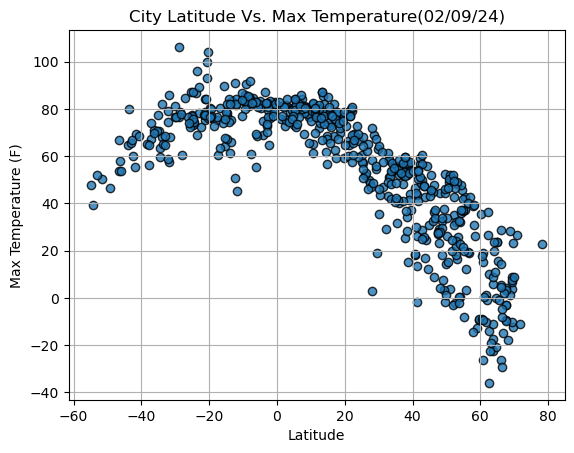

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

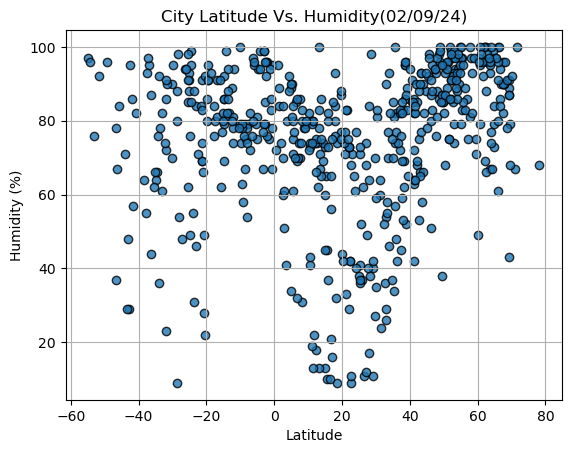

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

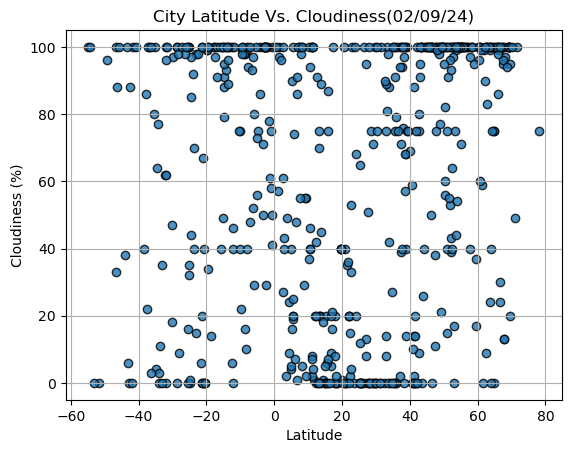

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

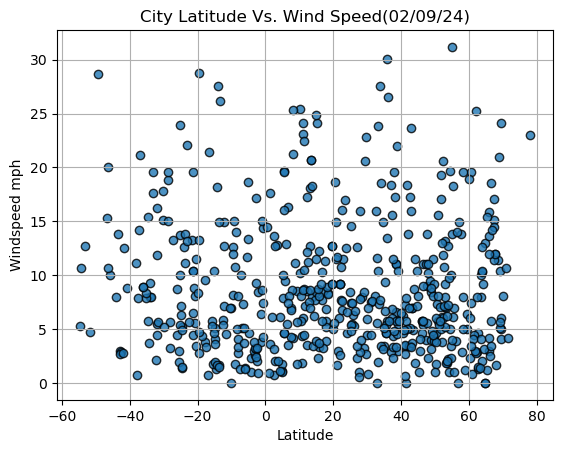

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ketchikan,55.3422,-131.6461,42.78,97,100,6.13,US,1707530936
6,qaqortoq,60.7167,-46.0333,15.21,95,100,7.43,GL,1707530937
7,freeport,40.6576,-73.5832,46.38,91,0,4.61,US,1707530937
8,mount pearl,47.5166,-52.7813,26.96,94,11,4.00,CA,1707530937
14,yellowknife,62.4560,-114.3525,-13.94,100,9,2.89,CA,1707530937


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,47.64,97,100,5.28,AR,1707530936
1,waitangi,-43.9535,-176.5597,64.81,71,38,8.01,NZ,1707530936
2,puerto ayora,-0.7393,-90.3518,79.56,95,41,7.45,EC,1707530936
4,port-aux-francais,-49.3500,70.2167,46.35,96,96,28.68,TF,1707530937
5,papatowai,-46.5619,169.4708,53.73,78,100,15.32,NZ,1707530937


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8751040184098408


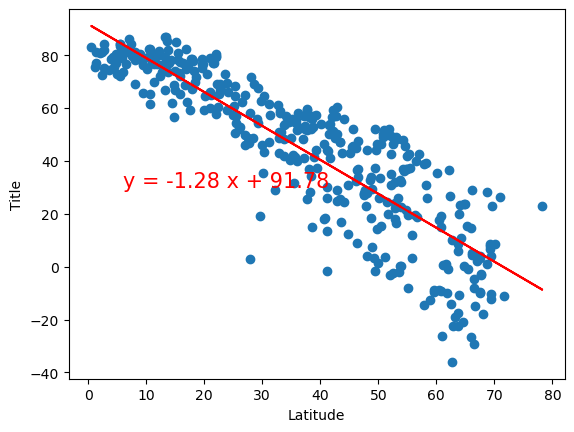

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (6,30))

The r-squared is: 0.49587121343420604


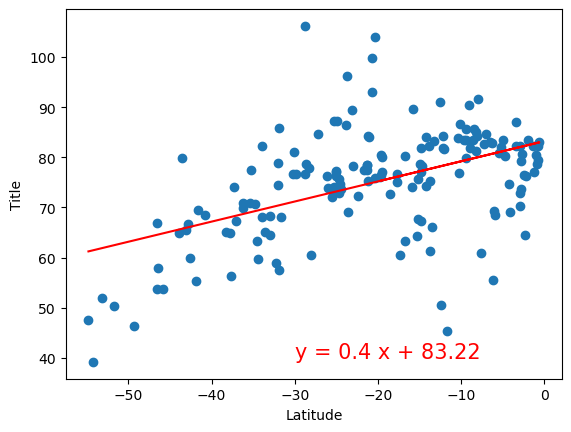

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp", (-30,40))

Moderate correlation between distance from the equator and temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.43516684086046564


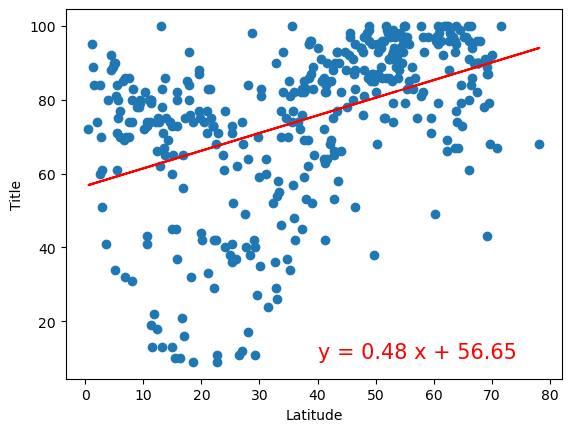

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (40,10))

The r-squared is: 0.21699603992425187


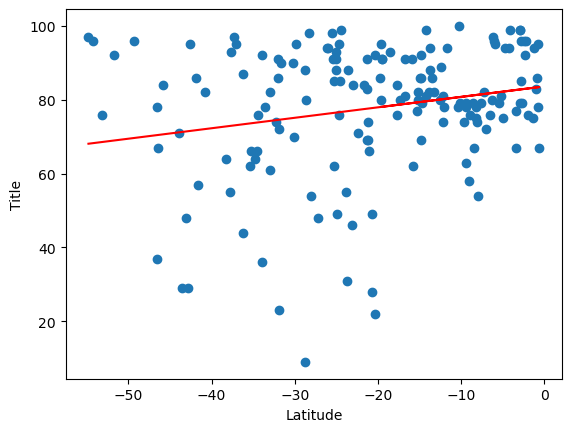

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, "Humidity", (-30,150))

No correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.41702866341372413


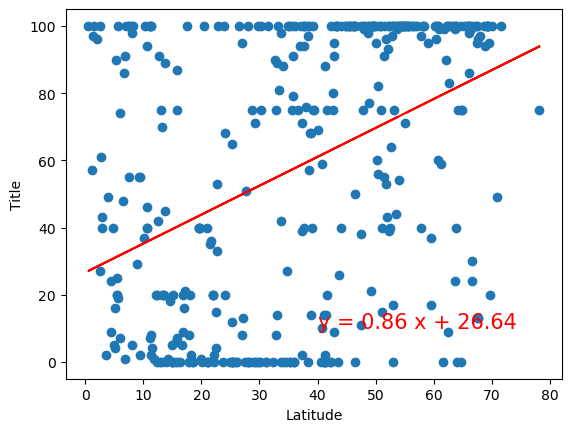

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (40,10))

The r-squared is: 0.19607600492304225


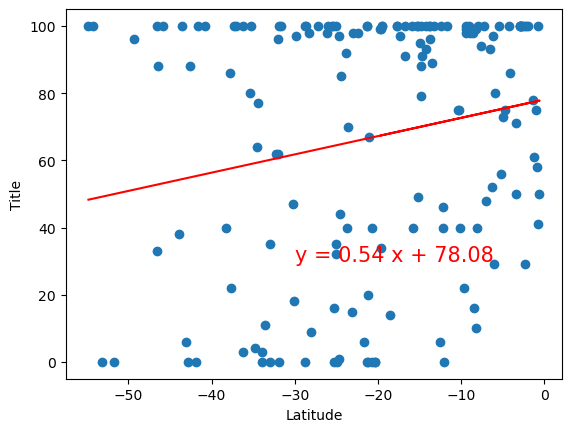

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, "Cloudiness", (-30,30))

No correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.05593674787290136


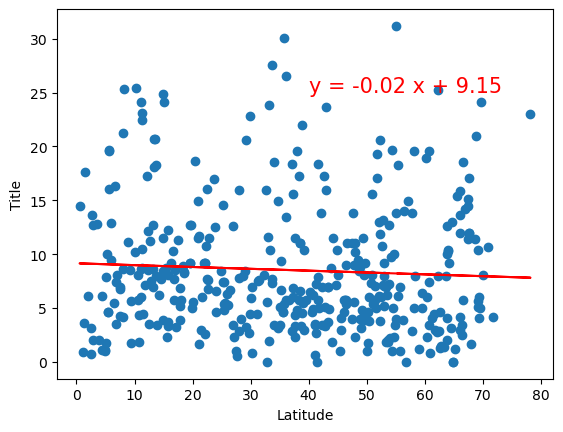

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (40,25))

The r-squared is: -0.21529595850790537


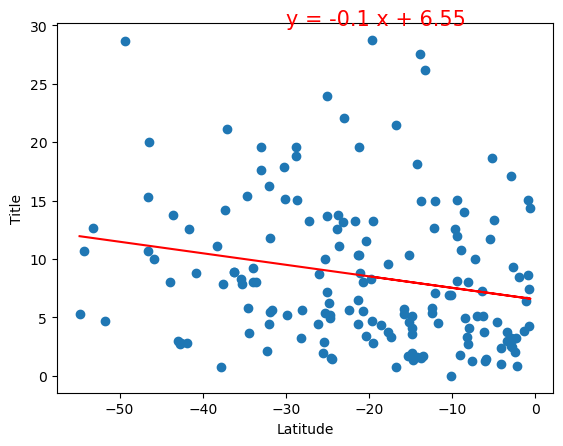

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, "Wind Speed", (-30,30))

No correlation between latitude and wind speed.